In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Conv1D, Dense, Dropout, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam, Nadam, Adagrad, SGD, RMSprop
# from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [348]:
df = pd.read_csv("sensor-nodes.csv")
df.head(10)


,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,01-02-2023 00:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,01-02-2023 00:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,01-02-2023 00:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,01-02-2023 00:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,01-02-2023 00:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0
5,6,01-02-2023 00:05,192.168.230.20,42.539308,1.777329,1.226797,140.306629,-48.164891,22.562783,80.792853,...,3,9.100424,10.912167,17.039896,17.098904,0.095630,41.592922,37.011924,135.173141,0
6,7,01-02-2023 00:06,192.168.201.178,34.371305,2.122728,1.238309,82.759149,-46.749541,22.199859,83.896476,...,5,5.514884,9.764031,14.729525,14.537270,0.112991,51.911647,33.413317,113.722314,0
7,8,01-02-2023 00:07,192.168.0.73,39.421713,1.632756,1.070672,128.744279,-47.965449,22.017101,73.018853,...,3,8.785059,7.424502,14.028956,16.584326,0.150733,43.373535,32.514071,101.301618,0
8,9,01-02-2023 00:08,192.168.35.14,64.392638,1.771348,0.614431,105.554913,-45.030005,19.406187,100.505321,...,4,9.652375,9.578266,20.649000,13.220874,0.133769,41.662683,36.024818,130.214575,0
9,10,01-02-2023 00:09,192.168.94.186,71.586404,2.874885,1.175556,109.901877,-43.949902,27.354364,76.642262,...,3,8.413089,14.570255,15.308871,14.962364,0.088105,39.467362,31.086755,130.360976,0


In [413]:
X = df.drop(columns=['Node_ID', 'Timestamp', 'IP_Address', 'Is_Malicious'])
y = df['Is_Malicious']


In [414]:
# scaler = StandardScaler()
scaler = MinMaxScaler()
# scaler = RobustScaler()


X_scaled = scaler.fit_transform(X)


In [426]:
# LSTM
X_train_val_lstm, X_test_lstm, y_train_val_lstm, y_test_lstm = train_test_split(
    X_scaled, y, test_size=0.2, random_state=40)

X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(
    X_train_val_lstm, y_train_val_lstm, test_size=0.25, random_state=40)

print("Shape of X_train:", X_train_lstm.shape)
print("Shape of X_val:", X_val_lstm.shape)
print("Shape of X_test:", X_test_lstm.shape)
print("Shape of y_train:", y_train_lstm.shape)
print("Shape of y_val:", y_val_lstm.shape)
print("Shape of y_test:", y_test_lstm.shape)


Shape of X_train: (6000, 17)
Shape of X_val: (2000, 17)
Shape of X_test: (2000, 17)
Shape of y_train: (6000,)
Shape of y_val: (2000,)
Shape of y_test: (2000,)


In [427]:
sequence_length = X_train_lstm.shape[1]
num_features = 1

X_train_reshaped_lstm = X_train_lstm.reshape(
    X_train_lstm.shape[0], X_train_lstm.shape[1])
X_val_reshaped_lstm = X_val_lstm.reshape(
    X_val_lstm.shape[0], X_val_lstm.shape[1])
X_test_reshaped_lstm = X_test_lstm.reshape(
    X_test_lstm.shape[0], X_test_lstm.shape[1])

print("Sequence length: ", sequence_length)
print("Num of features: ", num_features)


Sequence length:  17
Num of features:  1


In [428]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=32, input_shape=(sequence_length, num_features),
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
lstm_model.add(Dense(units=16, activation='relu'))

lstm_model.add(Dropout(0.4))


In [429]:
# Adam Optimizer
lstm_adam_optimizer = Adam(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_adam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

lstm_adam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm, epochs=100, batch_size=32, validation_data=(
    X_val_reshaped_lstm, y_val_lstm), callbacks=[early_stopping])


Epoch 1/100
188/188 [==============================] - 3s 7ms/step - loss: 0.5606 - accuracy: 0.0602 - val_loss: 0.4709 - val_accuracy: 0.0075
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 0.5204 - accuracy: 0.0662 - val_loss: 0.3941 - val_accuracy: 0.0175
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 0.5039 - accuracy: 0.4985 - val_loss: 0.3691 - val_accuracy: 0.3740
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4853 - accuracy: 0.6203 - val_loss: 0.3472 - val_accuracy: 0.6780
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4744 - accuracy: 0.8435 - val_loss: 0.3477 - val_accuracy: 0.9305
Epoch 6/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4605 - accuracy: 0.8843 - val_loss: 0.2734 - val_accuracy: 0.8830
Epoch 7/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4518 - accuracy: 0.8995 - val_loss: 0.2433 - val_accuracy: 0.1295

In [430]:
lstm_nadam_optimizer = Nadam(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_nadam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])
lstm_nadam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                    epochs=100, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm), callbacks=[early_stopping])


Epoch 1/100
188/188 [==============================] - 3s 7ms/step - loss: 0.3834 - accuracy: 0.9298 - val_loss: 0.1659 - val_accuracy: 0.9440
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3837 - accuracy: 0.9472 - val_loss: 0.1659 - val_accuracy: 0.9440
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3849 - accuracy: 0.9387 - val_loss: 0.1689 - val_accuracy: 0.9450
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3802 - accuracy: 0.9452 - val_loss: 0.1676 - val_accuracy: 0.9455
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3864 - accuracy: 0.9460 - val_loss: 0.1744 - val_accuracy: 0.9460
Epoch 6/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3924 - accuracy: 0.9438 - val_loss: 0.1607 - val_accuracy: 0.9440
Epoch 7/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3907 - accuracy: 0.9477 - val_loss: 0.1691 - val_accuracy: 0.9460

In [431]:
lstm_adagrad_optimizer = Adagrad(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_adagrad_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])
lstm_adagrad_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                      epochs=100, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm), callbacks=[early_stopping])


Epoch 1/100
188/188 [==============================] - 3s 7ms/step - loss: 0.3584 - accuracy: 0.9468 - val_loss: 0.1076 - val_accuracy: 0.9420
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3592 - accuracy: 0.9485 - val_loss: 0.1075 - val_accuracy: 0.9415
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3578 - accuracy: 0.9497 - val_loss: 0.1072 - val_accuracy: 0.9400
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3521 - accuracy: 0.9487 - val_loss: 0.1074 - val_accuracy: 0.9410
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3556 - accuracy: 0.9493 - val_loss: 0.1075 - val_accuracy: 0.9425
Epoch 6/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3591 - accuracy: 0.9500 - val_loss: 0.1073 - val_accuracy: 0.9410
Epoch 7/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3606 - accuracy: 0.9493 - val_loss: 0.1074 - val_accuracy: 0.9420

In [432]:
lstm_sgd_optimizer = SGD(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_sgd_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_sgd_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm, epochs=100,
                                  batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm), callbacks=[early_stopping])


Epoch 1/100
188/188 [==============================] - 5s 7ms/step - loss: 0.3559 - accuracy: 0.9487 - val_loss: 0.1073 - val_accuracy: 0.9400
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3510 - accuracy: 0.9492 - val_loss: 0.1073 - val_accuracy: 0.9405
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3607 - accuracy: 0.9488 - val_loss: 0.1074 - val_accuracy: 0.9415
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3587 - accuracy: 0.9493 - val_loss: 0.1074 - val_accuracy: 0.9415
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3598 - accuracy: 0.9498 - val_loss: 0.1072 - val_accuracy: 0.9405
Epoch 6/100
188/188 [==============================] - 1s 6ms/step - loss: 0.3620 - accuracy: 0.9498 - val_loss: 0.1072 - val_accuracy: 0.9410
Epoch 7/100
188/188 [==============================] - 1s 6ms/step - loss: 0.3543 - accuracy: 0.9485 - val_loss: 0.1073 - val_accuracy: 0.9410

In [433]:
lstm_rms_optimizer = RMSprop(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_rms_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_rms_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm, epochs=100,
                                  batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm), callbacks=[early_stopping])


Epoch 1/100
188/188 [==============================] - 3s 7ms/step - loss: 0.3531 - accuracy: 0.9447 - val_loss: 0.1082 - val_accuracy: 0.9450
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3489 - accuracy: 0.9485 - val_loss: 0.1084 - val_accuracy: 0.9450
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3624 - accuracy: 0.9475 - val_loss: 0.1072 - val_accuracy: 0.9445
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3490 - accuracy: 0.9478 - val_loss: 0.1068 - val_accuracy: 0.9410
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3503 - accuracy: 0.9467 - val_loss: 0.1123 - val_accuracy: 0.9465
Epoch 6/100
188/188 [==============================] - 1s 6ms/step - loss: 0.3568 - accuracy: 0.9480 - val_loss: 0.1123 - val_accuracy: 0.9420
Epoch 7/100
188/188 [==============================] - 1s 6ms/step - loss: 0.3608 - accuracy: 0.9488 - val_loss: 0.1076 - val_accuracy: 0.9285

In [434]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(
    X_test_reshaped_lstm, y_test_lstm)
print("Test LSTM Loss: ", lstm_loss)
print("Test LSTM Accuracy: ", lstm_accuracy)


63/63 [==============================] - 0s 2ms/step - loss: 0.0893 - accuracy: 0.9535
Test LSTM Loss:  0.08928628265857697
Test LSTM Accuracy:  0.953499972820282


In [441]:
lstm_train_probs = lstm_model.predict(X_train_reshaped_lstm, verbose=0)
lstm_train_classes = (lstm_train_probs > 0.9).astype("int32")

lstm_train_probs = lstm_train_probs[:, 0]
lstm_train_classes = lstm_train_classes[:, 0]

lstm_train_accuracy = accuracy_score(y_train_lstm, lstm_train_classes)
print("Accuracy: ", lstm_train_accuracy)

lstm_train_precision = precision_score(y_train_lstm, lstm_train_classes)
print("Precision: ", lstm_train_precision)

lstm_train_recall = recall_score(y_train_lstm, lstm_train_classes)
print("Recall: ", lstm_train_recall)

train_f1_score_value_lstm = f1_score(y_train_lstm, lstm_train_classes)
print("F1 score: ", train_f1_score_value_lstm)


Accuracy:  0.9983333333333333
Precision:  1.0
Recall:  0.9653979238754326
F1 score:  0.9823943661971831


In [442]:
lstm_probs = lstm_model.predict(X_test_reshaped_lstm, verbose=0)
lstm_classes = (lstm_probs > 0.7).astype("int32")

lstm_probs = lstm_probs[:, 0]
lstm_classes = lstm_classes[:, 0]

lstm_accuracy = accuracy_score(y_test_lstm, lstm_classes)
print("Accuracy: ", lstm_accuracy)

lstm_precision = precision_score(y_test_lstm, lstm_classes)
print("Precision: ", lstm_precision)

lstm_recall = recall_score(y_test_lstm, lstm_classes)
print("Recall: ", lstm_recall)

f1_score_value_lstm = f1_score(y_test_lstm, lstm_classes)
print("F1 score: ", f1_score_value_lstm)


Accuracy:  0.9985
Precision:  1.0
Recall:  0.9666666666666667
F1 score:  0.983050847457627


In [443]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']


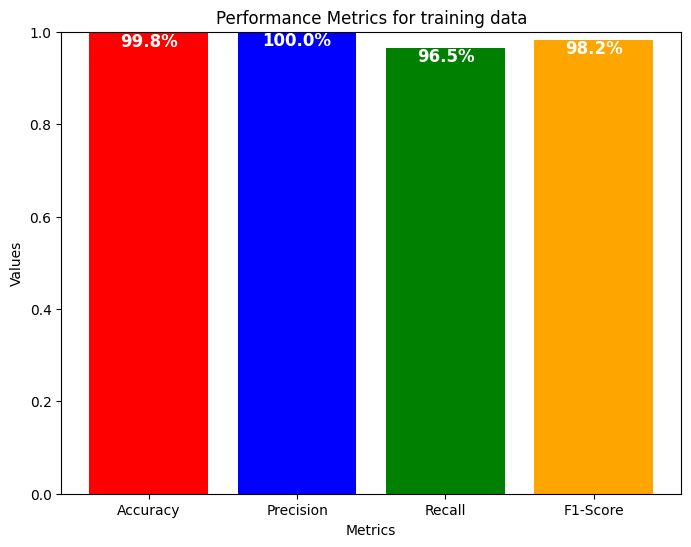

In [444]:
lstm_train_values = [lstm_train_accuracy, lstm_train_precision,
                     lstm_train_recall, train_f1_score_value_lstm]

plt.figure(figsize=(8, 6))
lstm_train_matrix_bars = plt.bar(metrics, lstm_train_values, color=['red',
                                                                    'blue', 'green', 'orange'])
for bar in lstm_train_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for training data')
plt.ylim([0, 1])
plt.show()


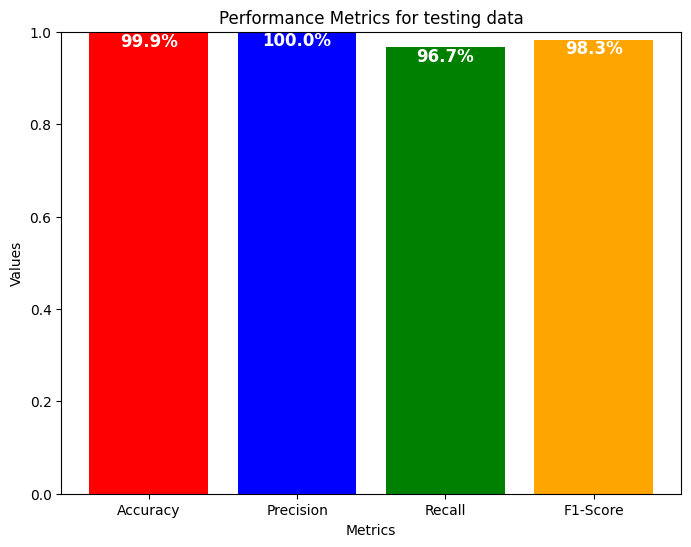

In [445]:
lstm_values = [lstm_accuracy, lstm_precision, lstm_recall, f1_score_value_lstm]

plt.figure(figsize=(8, 6))
lstm_matrix_bars = plt.bar(metrics, lstm_values, color=['red',
                           'blue', 'green', 'orange'])
for bar in lstm_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for testing data')
plt.ylim([0, 1])
plt.show()


In [461]:
# GRU
X_train_gru, X_temp_gru, y_train_gru, y_temp_gru = train_test_split(
    X_scaled, y, test_size=0.2, random_state=40)

X_val_gru, X_test_gru, y_val_gru, y_test_gru = train_test_split(
    X_temp_gru, y_temp_gru, test_size=0.3, random_state=40)

X_train_reshaped_gru = X_train_gru.reshape(-1, 1, X_train_gru.shape[1])
X_val_reshaped_gru = X_val_gru.reshape(-1, 1, X_val_gru.shape[1])
X_test_reshaped_gru = X_test_gru.reshape(-1, 1, X_test_gru.shape[1])


In [462]:
gru_model = Sequential()
gru_model.add(GRU(32, input_shape=(
    X_train_reshaped_gru.shape[1], X_train_reshaped_gru.shape[2]), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
gru_model.add(Dense(16, activation='relu'))
gru_model.add(Dropout(0.4))


In [463]:
gru_adam_optimizer = Adam(learning_rate=0.001)
gru_model.compile(optimizer=gru_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
gru_adam_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=100, batch_size=32, validation_data=(
    X_val_reshaped_gru, y_val_gru), callbacks=[early_stopping])


Epoch 1/100


250/250 [==============================] - 2s 3ms/step - loss: 0.6391 - accuracy: 0.1573 - val_loss: 0.3100 - val_accuracy: 0.3286
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.5938 - val_loss: 0.2663 - val_accuracy: 0.6443
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.7639 - val_loss: 0.2401 - val_accuracy: 0.8214
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4784 - accuracy: 0.8449 - val_loss: 0.2232 - val_accuracy: 0.8193
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.7664 - val_loss: 0.1763 - val_accuracy: 0.7821
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8512 - val_loss: 0.1671 - val_accuracy: 0.8521
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8683 - val_loss: 0.1610 - val_accuracy: 0.8864
Epoch 8/100

In [464]:
gru_nadam_optimizer = Nadam(learning_rate=0.001)
gru_model.compile(optimizer=gru_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_nadam_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=100,
                                  batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru), callbacks=[early_stopping])


Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.3402 - accuracy: 0.9473 - val_loss: 0.0475 - val_accuracy: 0.9529
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3350 - accuracy: 0.9474 - val_loss: 0.0448 - val_accuracy: 0.9336
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3398 - accuracy: 0.9476 - val_loss: 0.0508 - val_accuracy: 0.9579
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3288 - accuracy: 0.9475 - val_loss: 0.0469 - val_accuracy: 0.9529
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3415 - accuracy: 0.9471 - val_loss: 0.0487 - val_accuracy: 0.9579
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3471 - accuracy: 0.9485 - val_loss: 0.0470 - val_accuracy: 0.9579
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3309 - accuracy: 0.9479 - val_loss: 0.0450 - val_accuracy: 0.9464

In [465]:
gru_adagrad_optimizer = Adagrad(learning_rate=0.001)
gru_model.compile(optimizer=gru_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_adagrad_history = gru_model.fit(X_train_reshaped_gru, y_train_gru,
                                    epochs=100, batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru), callbacks=[early_stopping])


Epoch 1/100
250/250 [==============================] - 2s 4ms/step - loss: 0.3400 - accuracy: 0.9467 - val_loss: 0.0481 - val_accuracy: 0.9579
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3411 - accuracy: 0.9481 - val_loss: 0.0481 - val_accuracy: 0.9579
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3486 - accuracy: 0.9482 - val_loss: 0.0486 - val_accuracy: 0.9579
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3434 - accuracy: 0.9489 - val_loss: 0.0475 - val_accuracy: 0.9571
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3327 - accuracy: 0.9477 - val_loss: 0.0479 - val_accuracy: 0.9571
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.9484 - val_loss: 0.0476 - val_accuracy: 0.9571
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.9482 - val_loss: 0.0478 - val_accuracy: 0.9571

In [466]:
gru_sgd_optimizer = SGD(learning_rate=0.001)

gru_model.compile(optimizer=gru_sgd_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_sgd_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=100,
                                batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru), callbacks=[early_stopping])


Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.3369 - accuracy: 0.9479 - val_loss: 0.0477 - val_accuracy: 0.9571
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3411 - accuracy: 0.9486 - val_loss: 0.0477 - val_accuracy: 0.9571
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3323 - accuracy: 0.9480 - val_loss: 0.0483 - val_accuracy: 0.9579
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.9482 - val_loss: 0.0481 - val_accuracy: 0.9579
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.9485 - val_loss: 0.0480 - val_accuracy: 0.9571
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.9480 - val_loss: 0.0480 - val_accuracy: 0.9571
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.9480 - val_loss: 0.0483 - val_accuracy: 0.9579

In [467]:
gru_rms_optimizer = RMSprop(learning_rate=0.001)

gru_model.compile(optimizer=gru_rms_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_rms_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=100,
                                batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru), callbacks=[early_stopping])


Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.3365 - accuracy: 0.9448 - val_loss: 0.0513 - val_accuracy: 0.9579
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.9449 - val_loss: 0.0464 - val_accuracy: 0.9071
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3397 - accuracy: 0.9449 - val_loss: 0.0538 - val_accuracy: 0.9586
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3374 - accuracy: 0.9467 - val_loss: 0.0499 - val_accuracy: 0.9571
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3419 - accuracy: 0.9440 - val_loss: 0.0558 - val_accuracy: 0.9586
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.9489 - val_loss: 0.0504 - val_accuracy: 0.9586
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3367 - accuracy: 0.9474 - val_loss: 0.0523 - val_accuracy: 0.9579

In [468]:
gru_loss, gru_accuracy = gru_model.evaluate(X_test_reshaped_gru, y_test_gru)
print("Test GRU Loss: ", gru_loss)
print("Test GRU Accuracy: ", gru_accuracy)


19/19 [==============================] - 0s 1ms/step - loss: 0.0579 - accuracy: 0.9067
Test GRU Loss:  0.0578741654753685
Test GRU Accuracy:  0.9066666960716248


In [469]:
gru_train_probs = gru_model.predict(X_train_reshaped_gru, verbose=0)
gru_train_classes = (gru_train_probs > 0.9).astype("int32")

gru_train_probs = gru_train_probs[:, 0]
gru_train_classes = gru_train_classes[:, 0]

gru_train_accuracy = accuracy_score(y_train_gru, gru_train_classes)
print("Accuracy: ", gru_train_accuracy)

gru_train_precision = precision_score(
    y_train_gru, gru_train_classes, zero_division=1)
print("Precision: ", gru_train_precision)

gru_train_recall = recall_score(
    y_train_gru, gru_train_classes, zero_division=1)
print("Recall: ", gru_train_recall)

train_f1_score_value_gru = f1_score(
    y_train_gru, gru_train_classes, zero_division=1)
print("F1 score: ", train_f1_score_value_gru)


Accuracy:  0.9895
Precision:  1.0
Recall:  0.7884130982367759
F1 score:  0.8816901408450705


In [470]:
gru_probs = gru_model.predict(X_test_reshaped_gru, verbose=0)
gru_classes = (gru_probs > 0.9).astype("int32")

gru_probs = gru_probs[:, 0]
gru_classes = gru_classes[:, 0]

gru_accuracy = accuracy_score(y_test_gru, gru_classes)
print("Accuracy: ", gru_accuracy)

gru_precision = precision_score(y_test_gru, gru_classes, zero_division=1)
print("Precision: ", gru_precision)

gru_recall = recall_score(y_test_gru, gru_classes, zero_division=1)
print("Recall: ", gru_recall)

f1_score_value_gru = f1_score(y_test_gru, gru_classes, zero_division=1)
print("F1 score: ", f1_score_value_gru)


Accuracy:  0.9883333333333333
Precision:  1.0
Recall:  0.78125
F1 score:  0.8771929824561403


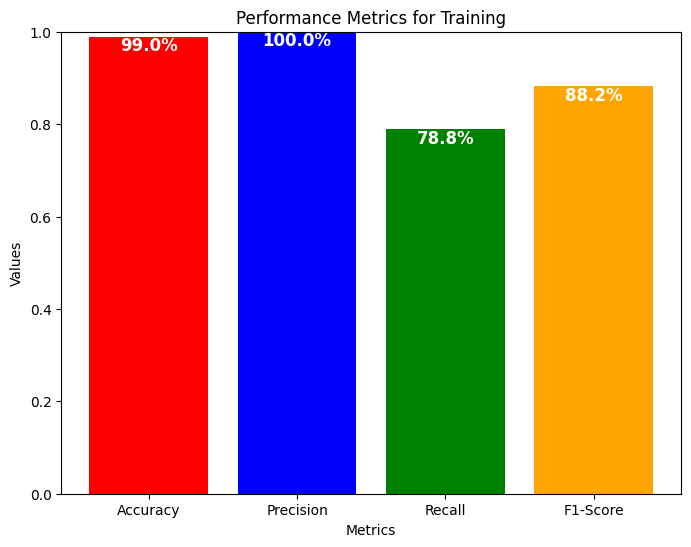

In [471]:
gru_values = [gru_train_accuracy, gru_train_precision,
              gru_train_recall, train_f1_score_value_gru]

plt.figure(figsize=(8, 6))
gru_matrix_bars = plt.bar(metrics, gru_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in gru_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for Training')
plt.ylim(0, 1)
plt.show()


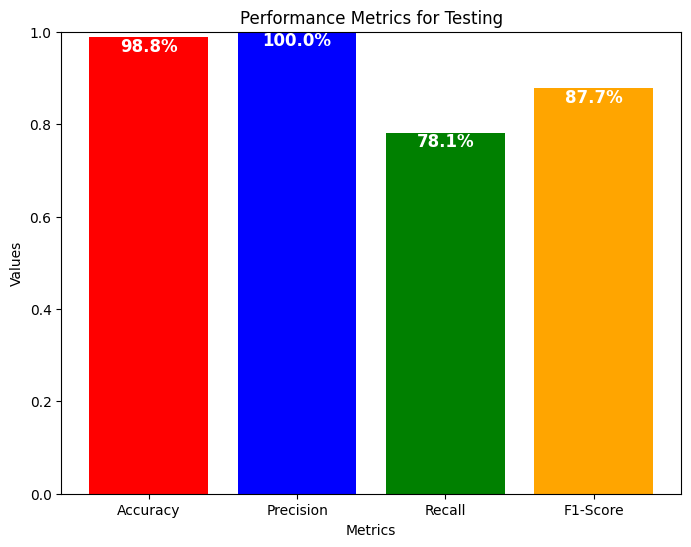

In [472]:
gru_values = [gru_accuracy, gru_precision, gru_recall, f1_score_value_gru]

plt.figure(figsize=(8, 6))
gru_matrix_bars = plt.bar(metrics, gru_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in gru_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for Testing')
plt.ylim(0, 1)
plt.show()


In [473]:
# CNN
X_train_cnn, X_temp_cnn, y_train_cnn, y_temp_cnn = train_test_split(
    X_scaled, y, test_size=0.2, random_state=40)

X_val_cnn, X_test_cnn, y_val_cnn, y_test_cnn = train_test_split(
    X_temp_cnn, y_temp_cnn, test_size=0.3, random_state=40)

print("Shape of X_train:", X_train_cnn.shape)

sequence_length = X_train_cnn.shape[1]
num_features = 1

X_train_reshaped_cnn = X_train_cnn.reshape(-1, sequence_length, num_features)
X_val_reshaped_cnn = X_val_cnn.reshape(-1, sequence_length, num_features)
X_test_reshaped_cnn = X_test_cnn.reshape(-1, sequence_length, num_features)


Shape of X_train: (8000, 17)


In [474]:
cnn_model = Sequential()

cnn_model.add(Conv1D(filters=32, kernel_size=3, input_shape=(
    sequence_length, num_features), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Conv1D(filters=16, kernel_size=2))

cnn_model.add(MaxPooling1D(pool_size=1))

cnn_model.add(Flatten())

cnn_model.add(Dense(8, activation="relu"))

cnn_model.add(Dropout(0.5))


In [475]:
cnn_adam_optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adam_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=100,
                                 batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn), callbacks=[early_stopping])


Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5823 - accuracy: 0.3886 - val_loss: 0.3140 - val_accuracy: 0.0014
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5613 - accuracy: 0.7567 - val_loss: 0.2892 - val_accuracy: 0.7636
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.8121 - val_loss: 0.2084 - val_accuracy: 0.7614
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.8528 - val_loss: 0.1993 - val_accuracy: 0.8271
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.8886 - val_loss: 0.1936 - val_accuracy: 0.8650
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.9122 - val_loss: 0.1906 - val_accuracy: 0.8893
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.9251 - val_loss: 0.1884 - val_accuracy: 0.9100

In [476]:
cnn_nadam_optimizer = Nadam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_nadam_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=100,
                                  batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn), callbacks=[early_stopping])


Epoch 1/100


250/250 [==============================] - 1s 2ms/step - loss: 0.4218 - accuracy: 0.9564 - val_loss: 0.0828 - val_accuracy: 0.9771
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.9613 - val_loss: 0.0840 - val_accuracy: 0.9707
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4251 - accuracy: 0.9592 - val_loss: 0.0872 - val_accuracy: 0.9607
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4369 - accuracy: 0.9535 - val_loss: 0.0887 - val_accuracy: 0.9586
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.9121 - val_loss: 0.0070 - val_accuracy: 0.9186
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.9405 - val_loss: 0.0100 - val_accuracy: 0.9536
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.9429 - val_loss: 0.0070 - val_accuracy: 0.9593
Epoch 8/100

In [477]:
cnn_adagrad_optimizer = Adagrad(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adagrad_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=100,
                                    batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn), callbacks=[early_stopping])


Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3823 - accuracy: 0.9553 - val_loss: 0.0025 - val_accuracy: 0.9557
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.9561 - val_loss: 0.0027 - val_accuracy: 0.9557
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.9549 - val_loss: 0.0026 - val_accuracy: 0.9557
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3832 - accuracy: 0.9555 - val_loss: 0.0028 - val_accuracy: 0.9571
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3832 - accuracy: 0.9540 - val_loss: 0.0028 - val_accuracy: 0.9564
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3779 - accuracy: 0.9567 - val_loss: 0.0028 - val_accuracy: 0.9571
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy: 0.9553 - val_loss: 0.0029 - val_accuracy: 0.9571

In [478]:
cnn_sgd_optimizer = SGD(learning_rate=0.001)

cnn_model.compile(optimizer=cnn_sgd_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

cnn_sgd_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=100,
                                batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn), callbacks=[early_stopping])


Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3791 - accuracy: 0.9553 - val_loss: 0.0027 - val_accuracy: 0.9557
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3750 - accuracy: 0.9561 - val_loss: 0.0026 - val_accuracy: 0.9557
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.9563 - val_loss: 0.0028 - val_accuracy: 0.9564
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3782 - accuracy: 0.9553 - val_loss: 0.0028 - val_accuracy: 0.9564
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3857 - accuracy: 0.9536 - val_loss: 0.0028 - val_accuracy: 0.9564
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.9553 - val_loss: 0.0029 - val_accuracy: 0.9564
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3777 - accuracy: 0.9553 - val_loss: 0.0029 - val_accuracy: 0.9564

In [479]:
cnn_rms_optimizer = RMSprop(learning_rate=0.001)

cnn_model.compile(optimizer=cnn_rms_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

cnn_rms_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=100,
                                batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn), callbacks=[early_stopping])


Epoch 1/100


250/250 [==============================] - 1s 2ms/step - loss: 0.3831 - accuracy: 0.9550 - val_loss: 0.0027 - val_accuracy: 0.9579
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.9610 - val_loss: 0.0033 - val_accuracy: 0.9579
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3796 - accuracy: 0.9599 - val_loss: 0.0108 - val_accuracy: 0.9586
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3797 - accuracy: 0.9605 - val_loss: 0.0045 - val_accuracy: 0.9514
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3922 - accuracy: 0.9553 - val_loss: 0.0054 - val_accuracy: 0.9607
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3869 - accuracy: 0.9554 - val_loss: 0.0058 - val_accuracy: 0.9571
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3806 - accuracy: 0.9589 - val_loss: 0.0058 - val_accuracy: 0.9729
Epoch 8/100

In [483]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped_cnn, y_test_cnn)
print("Test CNN Loss: ", cnn_loss)
print("Test CNN Accuracy: ", cnn_accuracy)


19/19 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 0.9533
Test CNN Loss:  0.0034841939341276884
Test CNN Accuracy:  0.95333331823349


In [488]:
cnn_train_probs = cnn_model.predict(X_train_reshaped_cnn, verbose=0)
cnn_train_classes = (cnn_train_probs > 0.7).astype("int32")

cnn_train_probs = cnn_train_probs[:, 0]
cnn_train_classes = cnn_train_classes[:, 0]

cnn_train_accuracy = accuracy_score(y_train_cnn, cnn_train_classes)
print("Accuracy: ", cnn_train_accuracy)

cnn_train_precision = precision_score(
    y_train_cnn, cnn_train_classes, zero_division=1)
print("Precision: ", cnn_train_precision)

cnn_train_recall = recall_score(
    y_train_cnn, cnn_train_classes, zero_division=1)
print("Recall: ", cnn_train_recall)

train_f1_score_value_cnn = f1_score(
    y_train_cnn, cnn_train_classes, zero_division=1)
print("F1 score: ", train_f1_score_value_cnn)


Accuracy:  0.999375
Precision:  1.0
Recall:  0.9874055415617129
F1 score:  0.9936628643852978


In [489]:
cnn_probs = cnn_model.predict(X_test_reshaped_cnn, verbose=0)
cnn_classes = (cnn_probs > 0.7).astype("int32")

cnn_probs = cnn_probs[:, 0]
cnn_classes = cnn_classes[:, 0]

cnn_accuracy = accuracy_score(y_test_cnn, cnn_classes)
print("Accuracy: ", cnn_accuracy)

cnn_precision = precision_score(y_test_cnn, cnn_classes, zero_division=1)
print("Precision: ", cnn_precision)

cnn_recall = recall_score(y_test_cnn, cnn_classes, zero_division=1)
print("Recall: ", cnn_recall)

f1_score_value_cnn = f1_score(y_test_cnn, cnn_classes, zero_division=1)
print("F1 score: ", f1_score_value_cnn)


Accuracy:  0.9966666666666667
Precision:  1.0
Recall:  0.9375
F1 score:  0.967741935483871


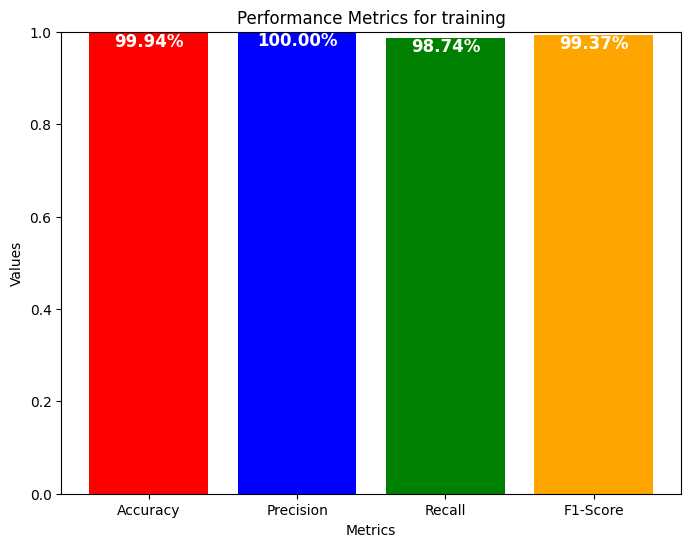

In [490]:
cnn_values = [cnn_train_accuracy, cnn_train_precision,
              cnn_train_recall, train_f1_score_value_cnn]

plt.figure(figsize=(8, 6))
cnn_matrix_bars = plt.bar(metrics, cnn_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in cnn_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.2f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for training')
plt.ylim(0, 1)
plt.show()


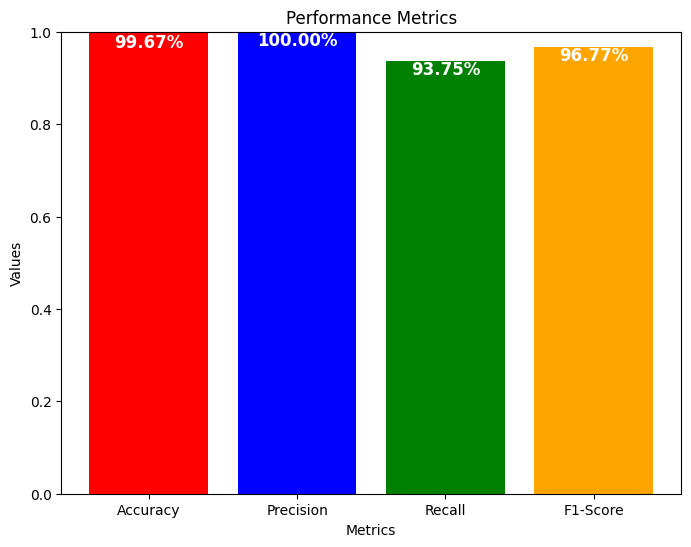

In [491]:
cnn_values = [cnn_accuracy, cnn_precision, cnn_recall, f1_score_value_cnn]

plt.figure(figsize=(8, 6))
cnn_matrix_bars = plt.bar(metrics, cnn_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in cnn_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.2f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics')
plt.ylim(0, 1)
plt.show()


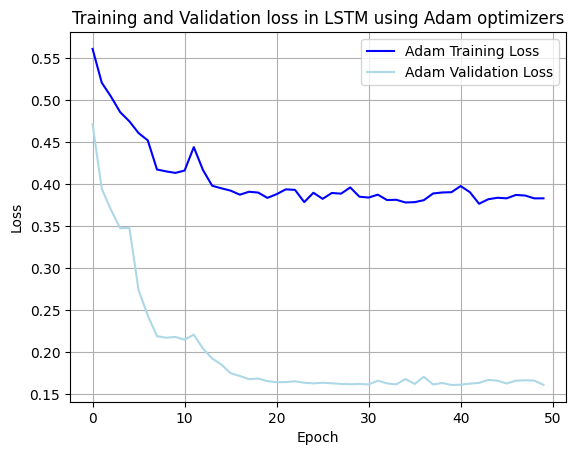

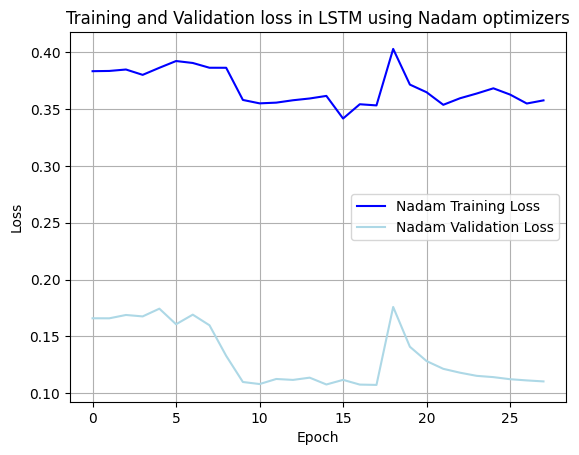

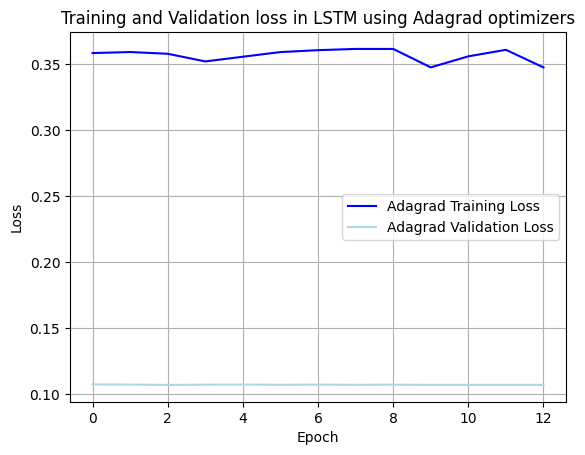

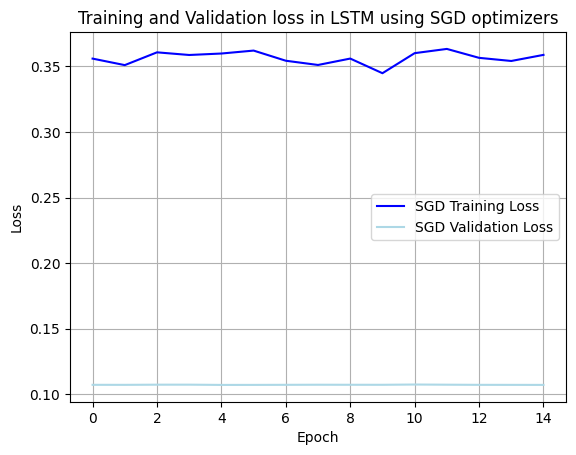

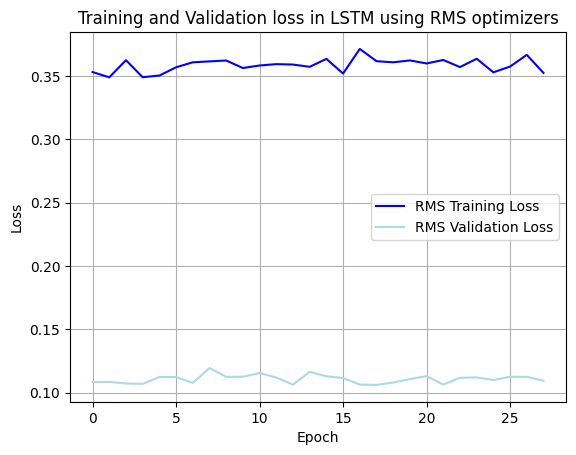

In [492]:
# ----- LSTM Adam Loss -----
plt.plot(lstm_adam_history.history['loss'],
         label="Adam Training Loss", color='blue')
plt.plot(lstm_adam_history.history['val_loss'],
         label="Adam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Nadam Loss -----
plt.plot(lstm_nadam_history.history['loss'],
         label="Nadam Training Loss", color='blue')
plt.plot(lstm_nadam_history.history['val_loss'],
         label="Nadam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Adgrad Loss -----
plt.plot(lstm_adagrad_history.history['loss'],
         label="Adagrad Training Loss", color='blue')
plt.plot(lstm_adagrad_history.history['val_loss'],
         label="Adagrad Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM SGD Loss -----
plt.plot(lstm_sgd_history.history['loss'],
         label="SGD Training Loss", color='blue')
plt.plot(lstm_sgd_history.history['val_loss'],
         label="SGD Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM RMSProp Loss -----
plt.plot(lstm_rms_history.history['loss'],
         label="RMS Training Loss", color='blue')
plt.plot(lstm_rms_history.history['val_loss'],
         label="RMS Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


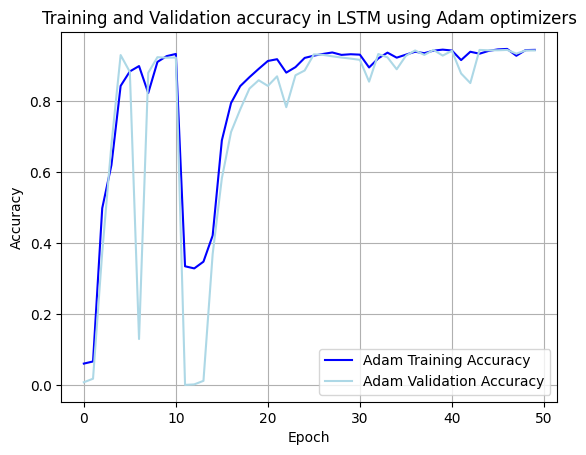

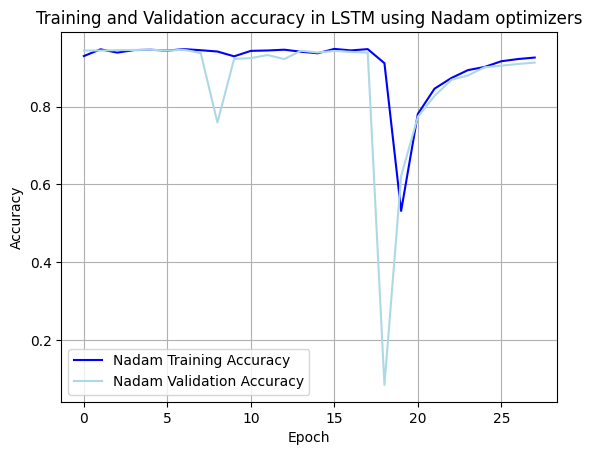

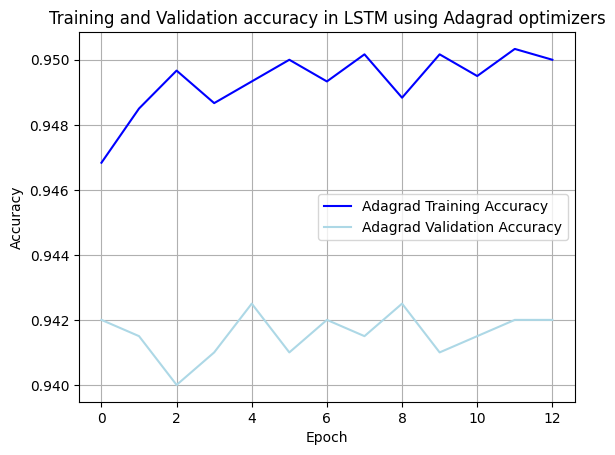

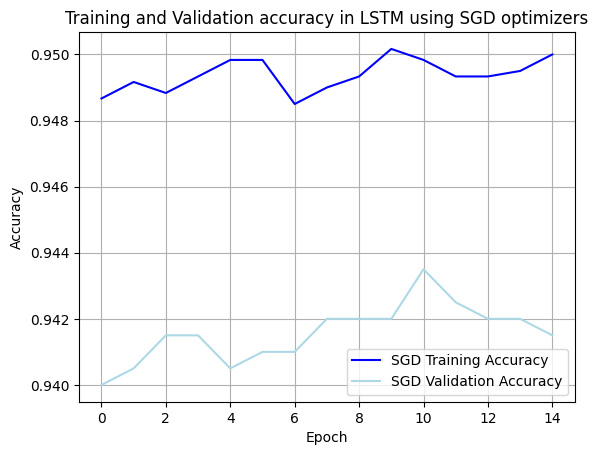

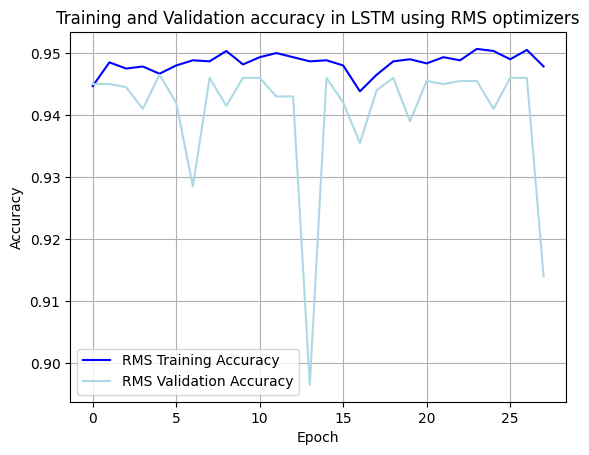

In [493]:
# ----- LSTM Adam Accuracy -----
plt.plot(lstm_adam_history.history['accuracy'],
         label="Adam Training Accuracy", color='blue')
plt.plot(lstm_adam_history.history['val_accuracy'],
         label="Adam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Nadam Accuracy -----
plt.plot(lstm_nadam_history.history['accuracy'],
         label="Nadam Training Accuracy", color='blue')
plt.plot(lstm_nadam_history.history['val_accuracy'],
         label="Nadam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Adgrad Accuracy -----
plt.plot(lstm_adagrad_history.history['accuracy'],
         label="Adagrad Training Accuracy", color='blue')
plt.plot(lstm_adagrad_history.history['val_accuracy'],
         label="Adagrad Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM SGD Accuracy -----
plt.plot(lstm_sgd_history.history['accuracy'],
         label="SGD Training Accuracy", color='blue')
plt.plot(lstm_sgd_history.history['val_accuracy'],
         label="SGD Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM RMSProp Accuracy -----
plt.plot(lstm_rms_history.history['accuracy'],
         label="RMS Training Accuracy", color='blue')
plt.plot(lstm_rms_history.history['val_accuracy'],
         label="RMS Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


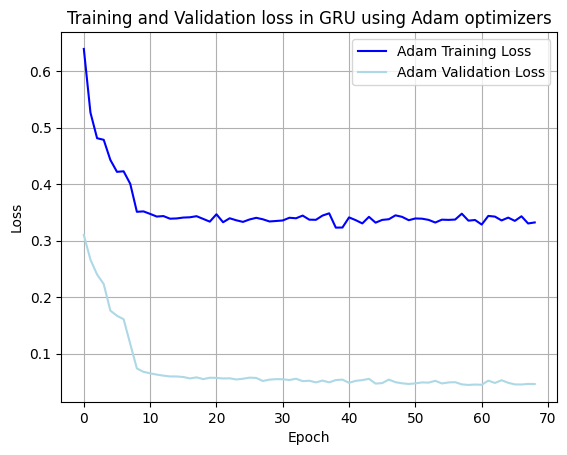

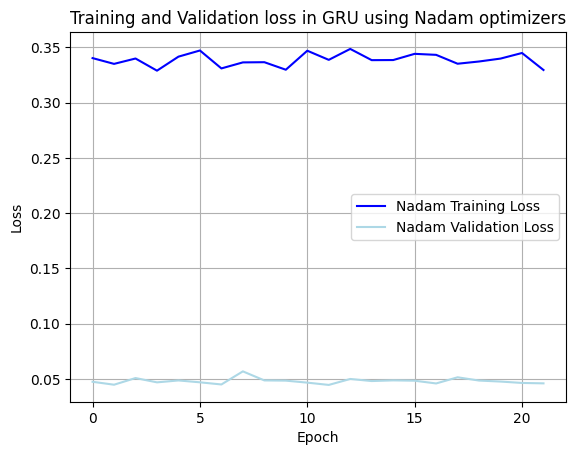

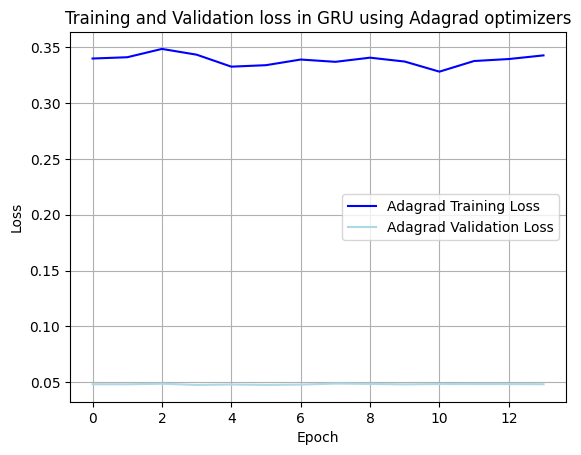

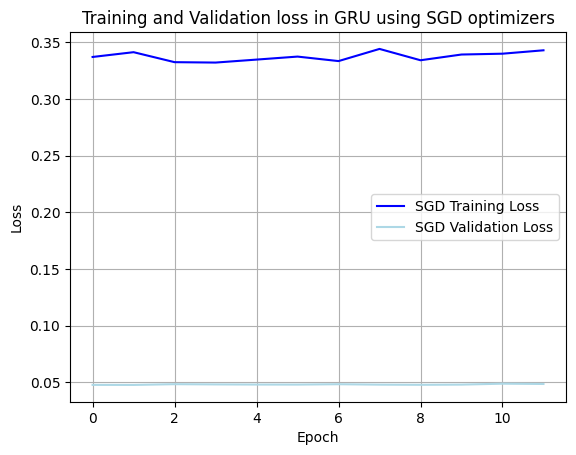

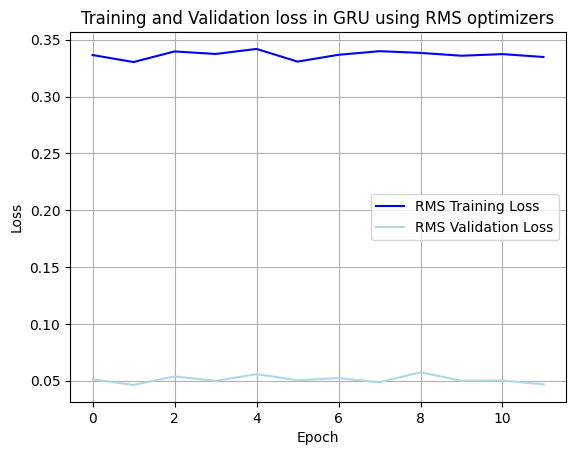

In [494]:
# ----- GRU Adam Loss -----
plt.plot(gru_adam_history.history['loss'],
         label="Adam Training Loss", color='blue')
plt.plot(gru_adam_history.history['val_loss'],
         label="Adam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Nadam Loss -----
plt.plot(gru_nadam_history.history['loss'],
         label="Nadam Training Loss", color='blue')
plt.plot(gru_nadam_history.history['val_loss'],
         label="Nadam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Adgrad Loss -----
plt.plot(gru_adagrad_history.history['loss'],
         label="Adagrad Training Loss", color='blue')
plt.plot(gru_adagrad_history.history['val_loss'],
         label="Adagrad Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU SGD Loss -----
plt.plot(gru_sgd_history.history['loss'],
         label="SGD Training Loss", color='blue')
plt.plot(gru_sgd_history.history['val_loss'],
         label="SGD Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU RMSProp Loss -----
plt.plot(gru_rms_history.history['loss'],
         label="RMS Training Loss", color='blue')
plt.plot(gru_rms_history.history['val_loss'],
         label="RMS Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


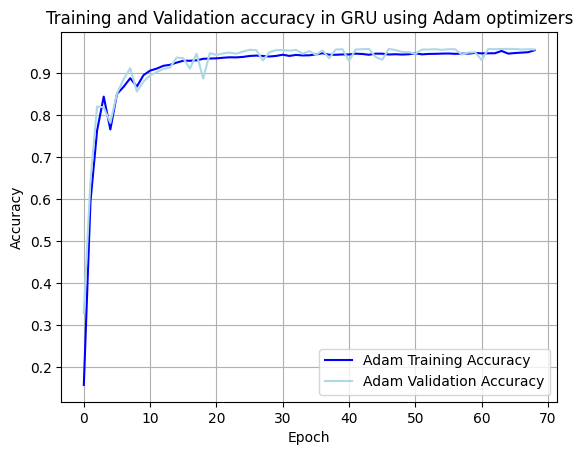

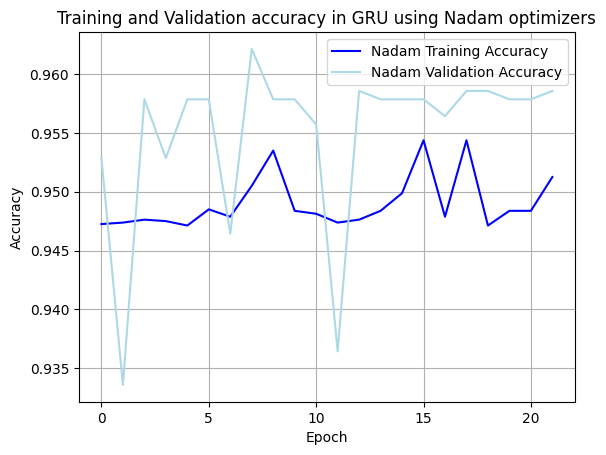

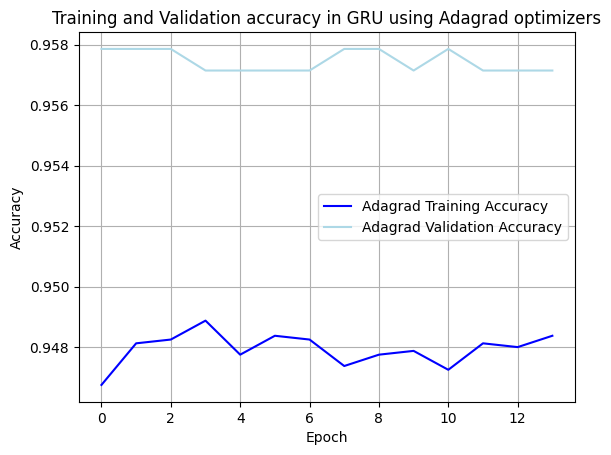

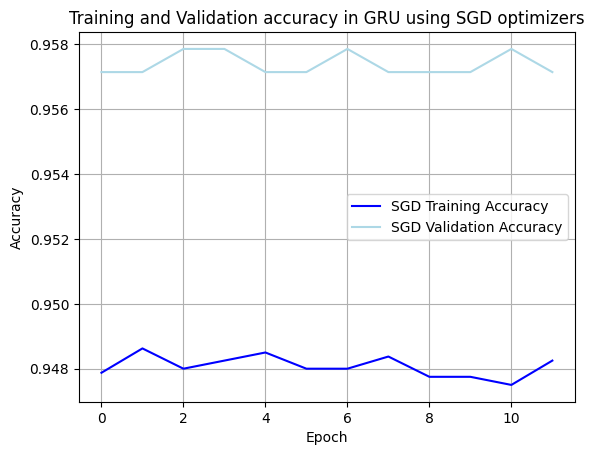

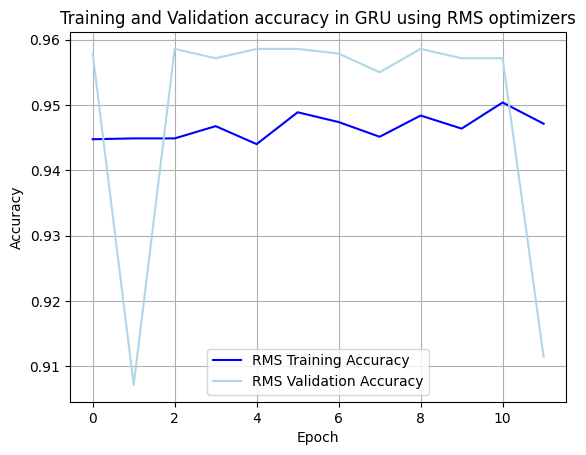

In [495]:
# ----- GRU Adam Accuracy -----
plt.plot(gru_adam_history.history['accuracy'],
         label="Adam Training Accuracy", color='blue')
plt.plot(gru_adam_history.history['val_accuracy'],
         label="Adam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Nadam Accuracy -----
plt.plot(gru_nadam_history.history['accuracy'],
         label="Nadam Training Accuracy", color='blue')
plt.plot(gru_nadam_history.history['val_accuracy'],
         label="Nadam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Adgrad Accuracy -----
plt.plot(gru_adagrad_history.history['accuracy'],
         label="Adagrad Training Accuracy", color='blue')
plt.plot(gru_adagrad_history.history['val_accuracy'],
         label="Adagrad Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU SGD Accuracy -----
plt.plot(gru_sgd_history.history['accuracy'],
         label="SGD Training Accuracy", color='blue')
plt.plot(gru_sgd_history.history['val_accuracy'],
         label="SGD Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU RMSProp Accuracy -----
plt.plot(gru_rms_history.history['accuracy'],
         label="RMS Training Accuracy", color='blue')
plt.plot(gru_rms_history.history['val_accuracy'],
         label="RMS Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


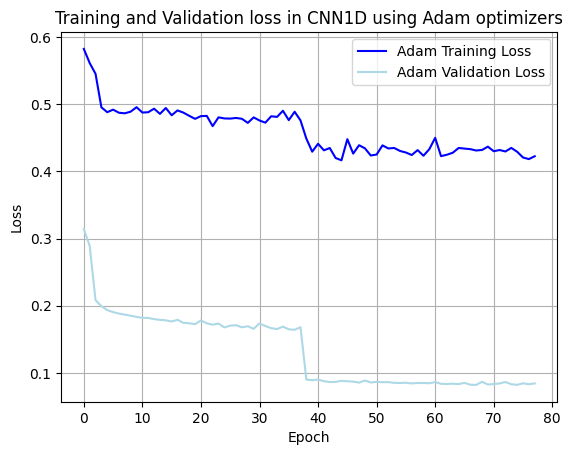

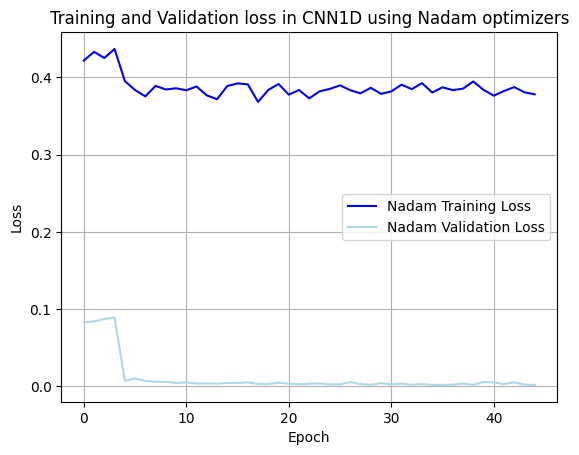

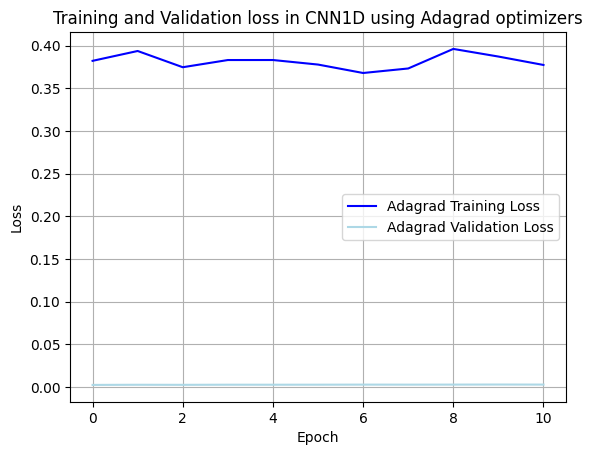

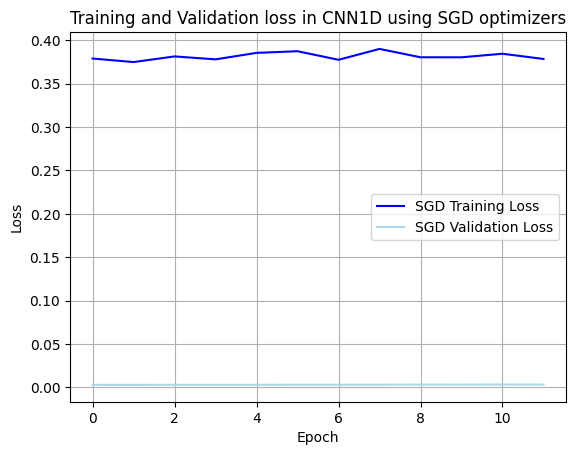

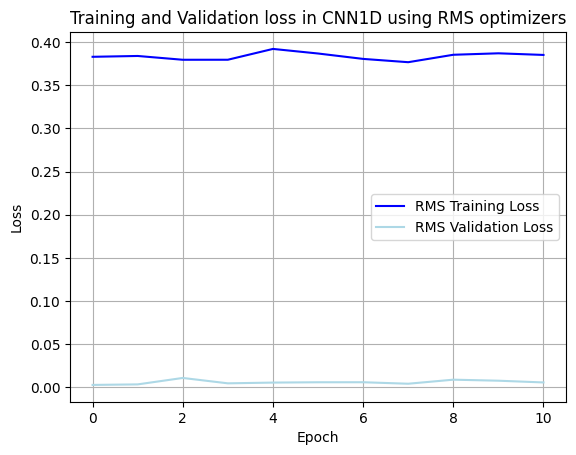

In [496]:
# ----- CNN1D Adam Loss -----
plt.plot(cnn_adam_history.history['loss'],
         label="Adam Training Loss", color='blue')
plt.plot(cnn_adam_history.history['val_loss'],
         label="Adam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D Nadam Loss -----
plt.plot(cnn_nadam_history.history['loss'],
         label="Nadam Training Loss", color='blue')
plt.plot(cnn_nadam_history.history['val_loss'],
         label="Nadam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D Adgrad Loss -----
plt.plot(cnn_adagrad_history.history['loss'],
         label="Adagrad Training Loss", color='blue')
plt.plot(cnn_adagrad_history.history['val_loss'],
         label="Adagrad Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D SGD Loss -----
plt.plot(cnn_sgd_history.history['loss'],
         label="SGD Training Loss", color='blue')
plt.plot(cnn_sgd_history.history['val_loss'],
         label="SGD Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D RMSProp Loss -----
plt.plot(cnn_rms_history.history['loss'],
         label="RMS Training Loss", color='blue')
plt.plot(cnn_rms_history.history['val_loss'],
         label="RMS Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


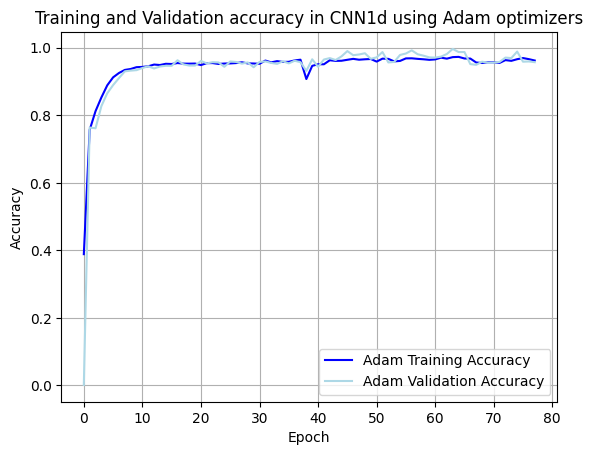

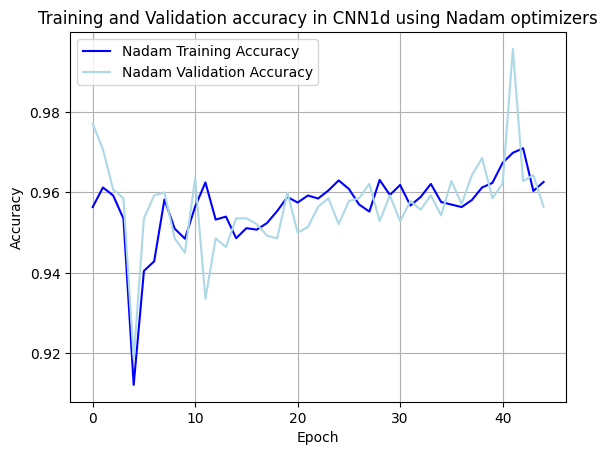

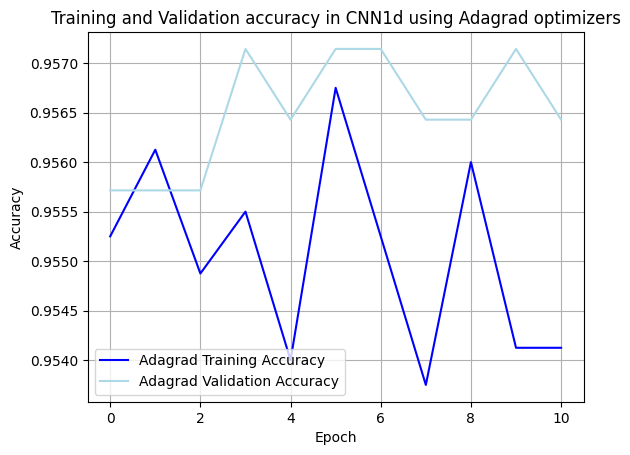

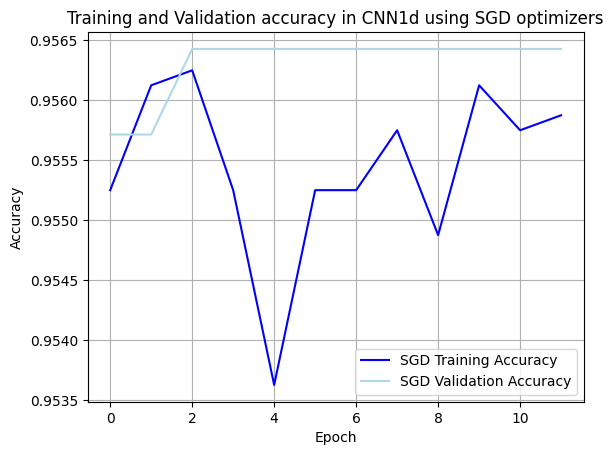

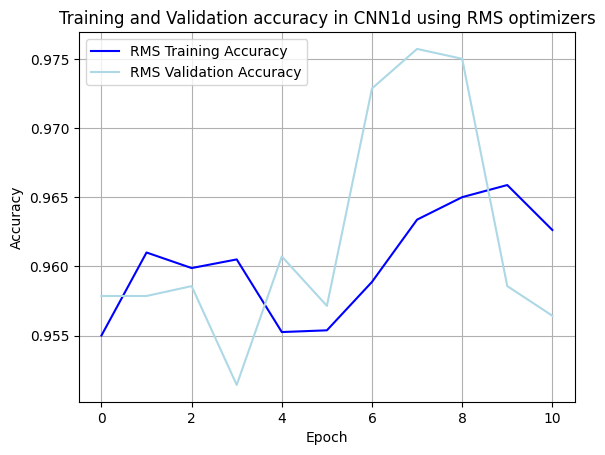

In [497]:
# ----- CNN1d Adam Accuracy -----
plt.plot(cnn_adam_history.history['accuracy'],
         label="Adam Training Accuracy", color='blue')
plt.plot(cnn_adam_history.history['val_accuracy'],
         label="Adam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d Nadam Accuracy -----
plt.plot(cnn_nadam_history.history['accuracy'],
         label="Nadam Training Accuracy", color='blue')
plt.plot(cnn_nadam_history.history['val_accuracy'],
         label="Nadam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d Adgrad Accuracy -----
plt.plot(cnn_adagrad_history.history['accuracy'],
         label="Adagrad Training Accuracy", color='blue')
plt.plot(cnn_adagrad_history.history['val_accuracy'],
         label="Adagrad Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d SGD Accuracy -----
plt.plot(cnn_sgd_history.history['accuracy'],
         label="SGD Training Accuracy", color='blue')
plt.plot(cnn_sgd_history.history['val_accuracy'],
         label="SGD Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d RMSProp Accuracy -----
plt.plot(cnn_rms_history.history['accuracy'],
         label="RMS Training Accuracy", color='blue')
plt.plot(cnn_rms_history.history['val_accuracy'],
         label="RMS Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [395]:
# plt.figure(figsize=(12, 6))

# cnn_adam_h = np.mean(cnn_adam_history.history['loss'])
# cnn_nadam_h = np.mean(cnn_nadam_history.history['loss'])
# cnn_adagrad_h = np.mean(cnn_adagrad_history.history['loss'])
# cnn_sgd_h = np.mean(cnn_sgd_history.history['loss'])
# cnn_rms_h = np.mean(cnn_rms_history.history['loss'])

# cnn_adam_h_v = np.mean(cnn_adam_history.history['val_loss'])
# cnn_nadam_h_v = np.mean(cnn_nadam_history.history['val_loss'])
# cnn_adagrad_h_v = np.mean(cnn_adagrad_history.history['val_loss'])
# cnn_sgd_h_v = np.mean(cnn_sgd_history.history['val_loss'])
# cnn_rms_h_v = np.mean(cnn_rms_history.history['val_loss'])

# cnn_optimizers = [cnn_adam_h, cnn_nadam_h,
#                   cnn_adagrad_h, cnn_sgd_h, cnn_rms_h]
# cnn_optimizers_v = [cnn_adam_h_v, cnn_nadam_h_v,
#                     cnn_adagrad_h_v, cnn_sgd_h_v, cnn_rms_h_v]

# plt.plot(cnn_optimizers, label="Loss", color='blue')
# plt.plot(cnn_optimizers_v, label="Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()


In [396]:
# plt.figure(figsize=(12, 6))

# cnn_adam_acc = np.mean(cnn_adam_history.history['accuracy'])
# cnn_nadam_acc = np.mean(cnn_nadam_history.history['accuracy'])
# cnn_adagrad_acc = np.mean(cnn_adagrad_history.history['accuracy'])
# cnn_sgd_acc = np.mean(cnn_sgd_history.history['accuracy'])
# cnn_rms_acc = np.mean(cnn_rms_history.history['accuracy'])

# cnn_adam_val_acc = np.mean(cnn_adam_history.history['val_accuracy'])
# cnn_nadam_val_acc = np.mean(cnn_nadam_history.history['val_accuracy'])
# cnn_adagrad_val_acc = np.mean(cnn_adagrad_history.history['val_accuracy'])
# cnn_sgd_val_acc = np.mean(cnn_sgd_history.history['val_accuracy'])
# cnn_rms_val_acc = np.mean(cnn_rms_history.history['val_accuracy'])


# cnn_optimizers_acc = [cnn_adam_acc, cnn_nadam_acc,
#                       cnn_adagrad_acc, cnn_sgd_acc, cnn_rms_acc]
# cnn_optimizers_val_acc = [cnn_adam_val_acc, cnn_nadam_val_acc,
#                           cnn_adagrad_val_acc, cnn_sgd_val_acc, cnn_rms_val_acc]

# plt.plot(cnn_optimizers_acc, label="Accuracy", color='blue')
# plt.plot(cnn_optimizers_val_acc, label="Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1D")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()


In [498]:
models = ['LSTM', 'GRU', '1D-CNN']


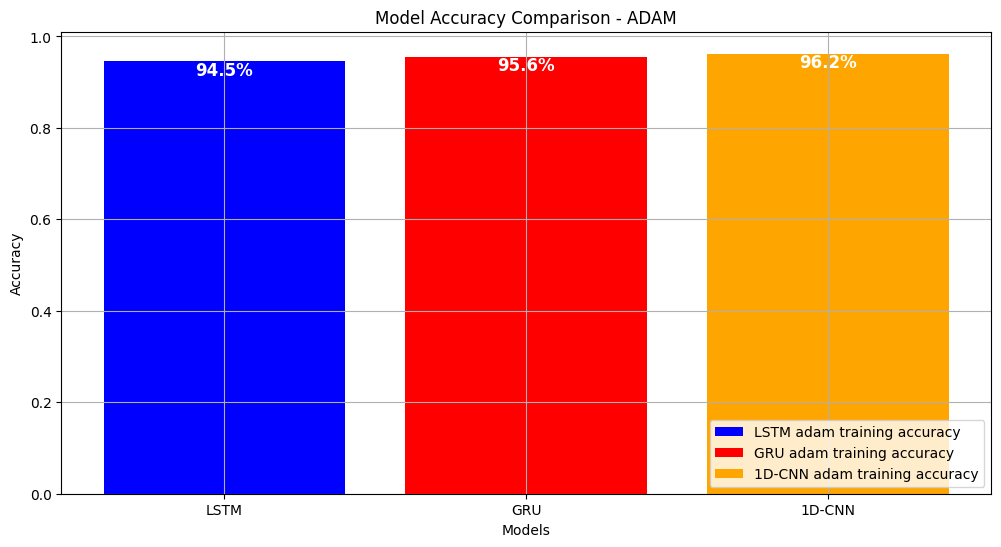

In [499]:
plt.figure(figsize=(12, 6))

# lstm_adam_train_acc = np.mean(lstm_adam_history.history["accuracy"])
# lstm_adam_val_acc = np.mean(lstm_adam_history.history["val_accuracy"])

# gru_adam_train_acc = np.mean(gru_adam_history.history["accuracy"])
# gru_adam_val_acc = np.mean(gru_adam_history.history["val_accuracy"])

# cnn_adam_train_acc = np.mean(cnn_adam_history.history["accuracy"])
# cnn_adam_val_acc = np.mean(cnn_adam_history.history["val_accuracy"])

adam_histories = [lstm_adam_history, gru_adam_history, cnn_adam_history]

# adam_accuracies = [lstm_adam_train_acc, gru_adam_train_acc, cnn_adam_train_acc]

adam_accuracies = [a_history.history['accuracy'][-1]
                   for a_history in adam_histories]

adam_bar = plt.bar(models, adam_accuracies, label=['LSTM adam training accuracy',
                                                   'GRU adam training accuracy', '1D-CNN adam training accuracy'], color=['blue', 'red', 'orange'])

for bar in adam_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title("Model Accuracy Comparison - ADAM")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


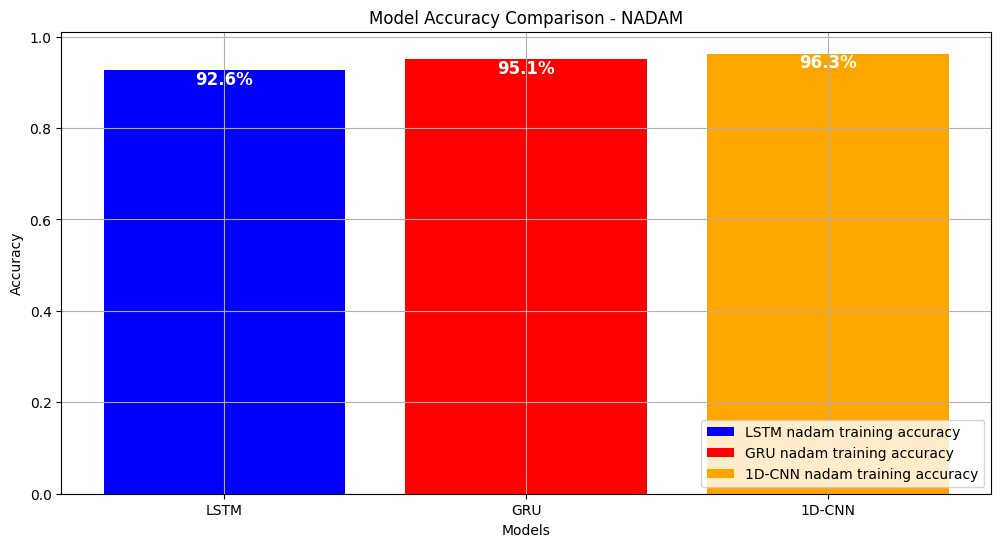

In [500]:
plt.figure(figsize=(12, 6))

# lstm_nadam_train_acc = np.mean(lstm_nadam_history.history["accuracy"])
# lstm_nadam_val_acc = lstm_nadam_history.history["val_accuracy"]

# gru_nadam_train_acc = np.mean(gru_nadam_history.history["accuracy"])
# gru_nadam_val_acc = gru_nadam_history.history["val_accuracy"]

# cnn_nadam_train_acc = np.mean(cnn_nadam_history.history["accuracy"])
# cnn_nadam_val_acc = cnn_nadam_history.history["val_accuracy"]

# nadam_accuracies = [lstm_nadam_train_acc,
#                     gru_nadam_train_acc, cnn_nadam_train_acc]

nadam_histories = [lstm_nadam_history, gru_nadam_history, cnn_nadam_history]

nadam_accuracies = [n_history.history['accuracy'][-1]
                    for n_history in nadam_histories]

nadam_bar = plt.bar(models, nadam_accuracies, label=['LSTM nadam training accuracy',
                                                     'GRU nadam training accuracy', '1D-CNN nadam training accuracy'], color=['blue', 'red', 'orange'])

for bar in nadam_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - NADAM')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


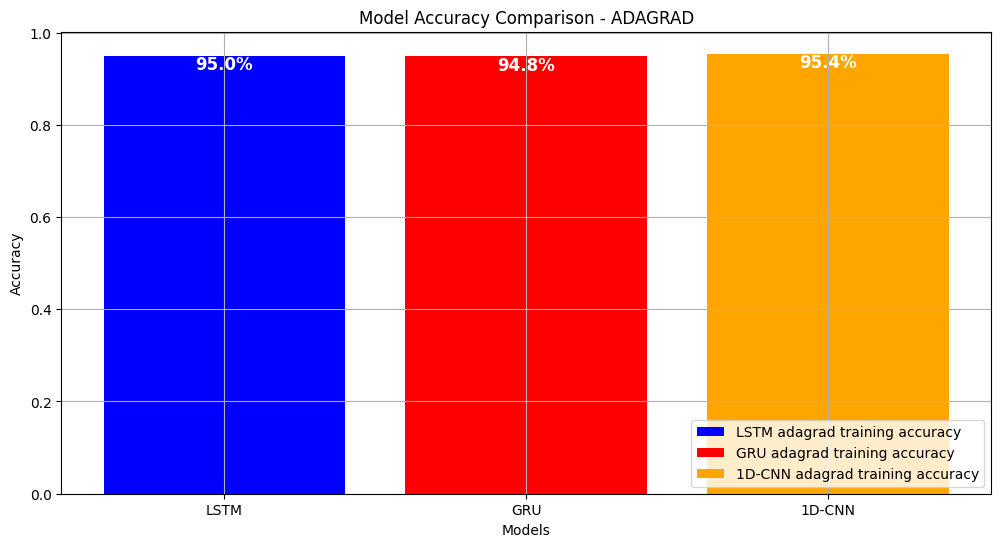

In [501]:
plt.figure(figsize=(12, 6))

# lstm_adagrad_train_acc = np.mean(lstm_adagrad_history.history['accuracy'])
# lstm_adagrad_val_acc = lstm_adagrad_history.history['val_accuracy']

# gru_adagrad_train_acc = np.mean(gru_adagrad_history.history['accuracy'])
# gru_adagrad_val_acc = gru_adagrad_history.history['val_accuracy']

# cnn_adagrad_train_acc = np.mean(cnn_adagrad_history.history['accuracy'])
# cnn_adagrad_val_acc = cnn_adagrad_history.history['val_accuracy']

# adagrad_accuracies = [lstm_adagrad_train_acc,
#                       gru_adagrad_train_acc, cnn_adagrad_train_acc]

adagrad_histories = [lstm_adagrad_history,
                     gru_adagrad_history, cnn_adagrad_history]

adagrad_accuracies = [ad_history.history['accuracy'][-1]
                      for ad_history in adagrad_histories]

adagrad_bar = plt.bar(models, adagrad_accuracies,  label=['LSTM adagrad training accuracy',
                                                          'GRU adagrad training accuracy', '1D-CNN adagrad training accuracy'], color=['blue', 'red',  'orange'])

for bar in adagrad_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - ADAGRAD')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


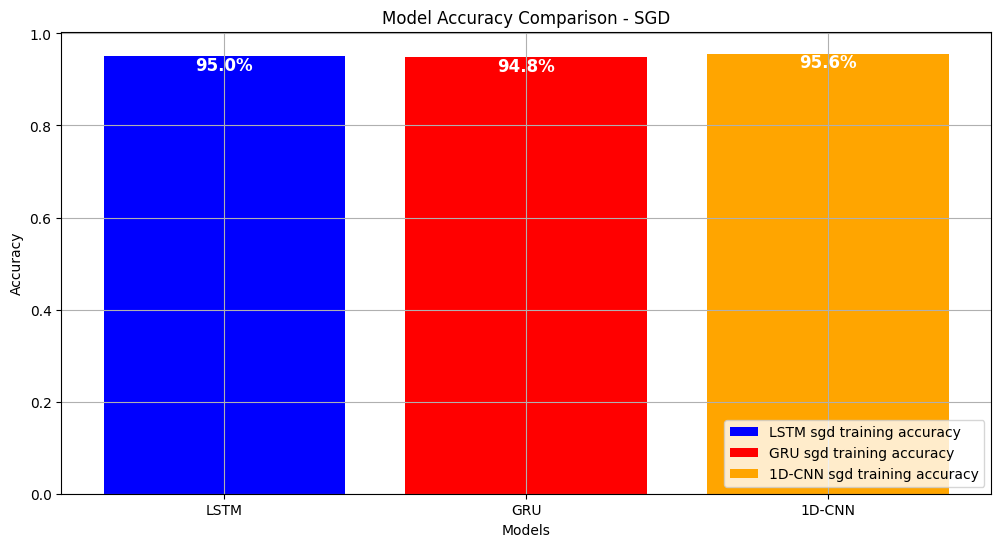

In [502]:
plt.figure(figsize=(12, 6))

# lstm_sgd_train_acc = np.mean(lstm_sgd_history.history['accuracy'])

# gru_sgd_train_acc = np.mean(gru_sgd_history.history['accuracy'])

# cnn_sgd_train_acc = np.mean(cnn_sgd_history.history['accuracy'])

# sgd_accuracies = [lstm_sgd_train_acc,
#                   gru_sgd_train_acc, cnn_sgd_train_acc]

sgd_histories = [lstm_sgd_history, gru_sgd_history, cnn_sgd_history]

sgd_accuracies = [sgd_history.history['accuracy'][-1]
                  for sgd_history in sgd_histories]

sgd_bar = plt.bar(models, sgd_accuracies,  label=['LSTM sgd training accuracy',
                                                  'GRU sgd training accuracy', '1D-CNN sgd training accuracy'], color=['blue', 'red',  'orange'])

for bar in sgd_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - SGD')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


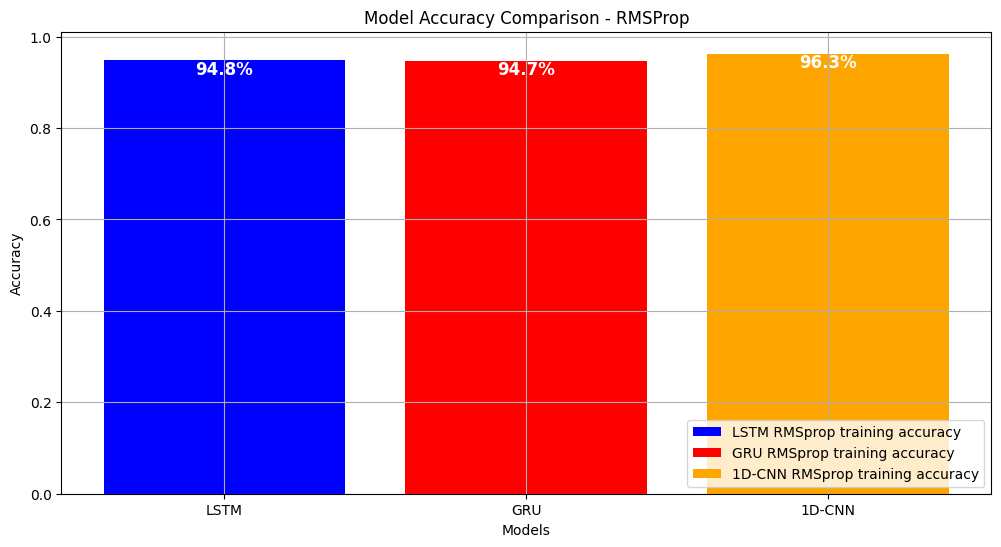

In [503]:
plt.figure(figsize=(12, 6))

# lstm_rms_train_acc = np.mean(lstm_rms_history.history['accuracy'])
# gru_rms_train_acc = np.mean(gru_rms_history.history['accuracy'])
# cnn_rms_train_acc = np.mean(cnn_rms_history.history['accuracy'])

# rms_accuracies = [lstm_rms_train_acc, gru_rms_train_acc, cnn_rms_train_acc]

rms_histories = [lstm_rms_history, gru_rms_history, cnn_rms_history]

rms_accuracies = [rms_history.history['accuracy'][-1]
                  for rms_history in rms_histories]

rms_bar = plt.bar(models, rms_accuracies, label=['LSTM RMSprop training accuracy',
                                                 'GRU RMSprop training accuracy', '1D-CNN RMSprop training accuracy'], color=['blue', 'red',  'orange'])

for bar in rms_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - RMSProp')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


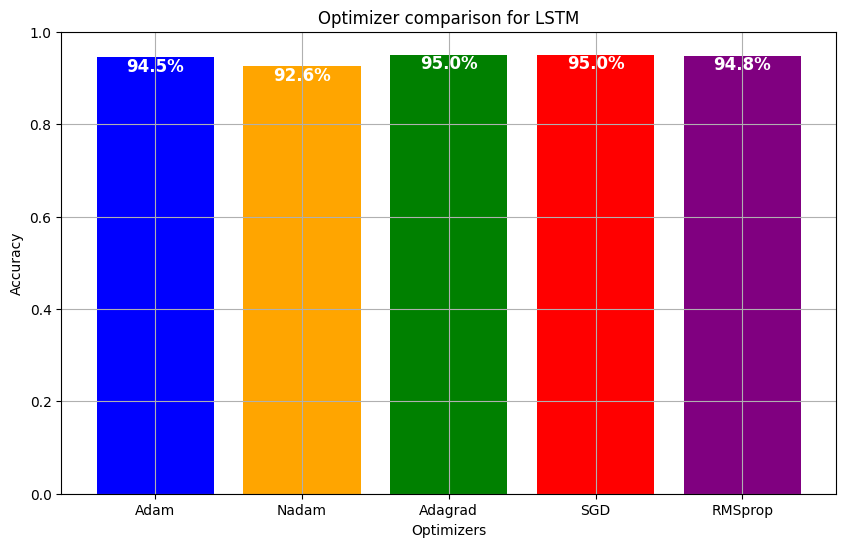

In [504]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
lstm_histories = [lstm_adam_history, lstm_nadam_history,
                  lstm_adagrad_history, lstm_sgd_history, lstm_rms_history]

plt.figure(figsize=(10, 6))

lstm_accuracies = [history.history['accuracy'][-1]
                   for history in lstm_histories]

lstm_bars = plt.bar(optimizers, lstm_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for LSTM")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in lstm_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.show()


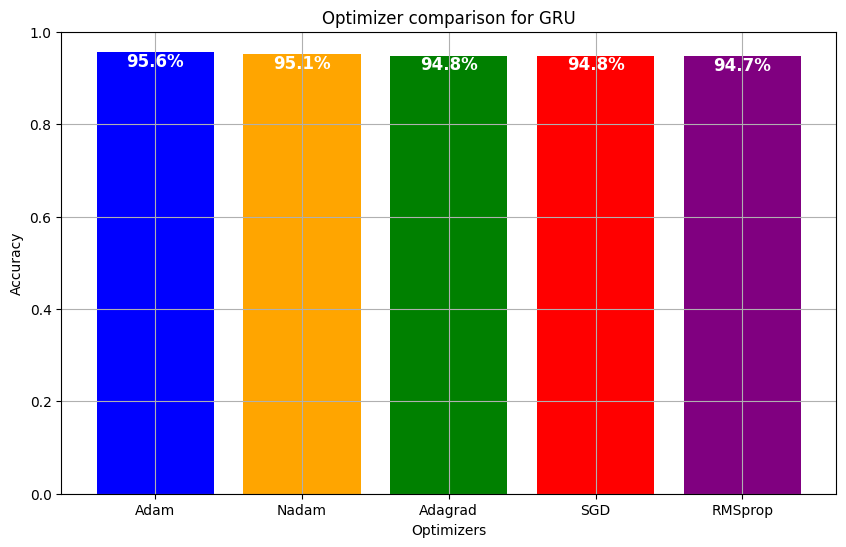

In [505]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
gru_histories = [gru_adam_history, gru_nadam_history,
                 gru_adagrad_history, gru_sgd_history, gru_rms_history]

plt.figure(figsize=(10, 6))

gru_accuracies = [history.history['accuracy'][-1] for history in gru_histories]

gru_bars = plt.bar(optimizers, gru_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for GRU")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in gru_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.show()


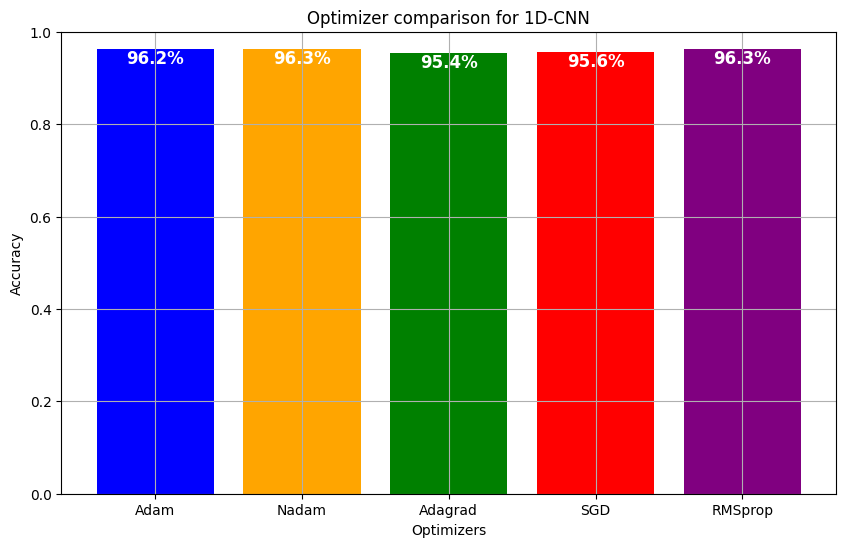

In [506]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
cnn_histories = [cnn_adam_history, cnn_nadam_history,
                 cnn_adagrad_history, cnn_sgd_history, cnn_rms_history]

plt.figure(figsize=(10, 6))

cnn_accuracies = [history.history['accuracy'][-1] for history in cnn_histories]

cnn_bars = plt.bar(optimizers, cnn_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for 1D-CNN")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in cnn_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.show()
